In [2]:
import re
import os
import joblib
import kagglehub
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from datasets import load_dataset

In [3]:
path = kagglehub.dataset_download("shanegerami/ai-vs-human-text")
print("Path to dataset files:", path)

dataset_path = os.path.join(path, "AI_Human.csv")
print("Dataset path:", dataset_path)

dataset_files = os.listdir(path)
print("Dataset files:", dataset_files)

Path to dataset files: C:\Users\adham\.cache\kagglehub\datasets\shanegerami\ai-vs-human-text\versions\1
Dataset path: C:\Users\adham\.cache\kagglehub\datasets\shanegerami\ai-vs-human-text\versions\1\AI_Human.csv
Dataset files: ['AI_Human.csv']


In [4]:
df=pd.read_csv(dataset_path)
df.head()

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487235 entries, 0 to 487234
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   text       487235 non-null  object 
 1   generated  487235 non-null  float64
dtypes: float64(1), object(1)
memory usage: 7.4+ MB


In [6]:
df.rename(columns={"generated": "source"}, inplace=True)

In [7]:
df['text'][0]

'Cars. Cars have been around since they became famous in the 1900s, when Henry Ford created and built the first ModelT. Cars have played a major role in our every day lives since then. But now, people are starting to question if limiting car usage would be a good thing. To me, limiting the use of cars might be a good thing to do.\n\nIn like matter of this, article, "In German Suburb, Life Goes On Without Cars," by Elizabeth Rosenthal states, how automobiles are the linchpin of suburbs, where middle class families from either Shanghai or Chicago tend to make their homes. Experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe. Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europe...and up to 50 percent in some carintensive areas in the United States. Cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go. Article

<Axes: xlabel='source', ylabel='count'>

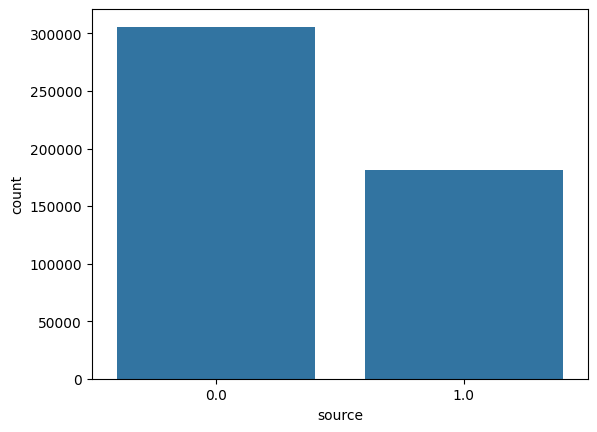

In [8]:
sns.countplot(data=df,x='source')

In [9]:
df['text'][0]

'Cars. Cars have been around since they became famous in the 1900s, when Henry Ford created and built the first ModelT. Cars have played a major role in our every day lives since then. But now, people are starting to question if limiting car usage would be a good thing. To me, limiting the use of cars might be a good thing to do.\n\nIn like matter of this, article, "In German Suburb, Life Goes On Without Cars," by Elizabeth Rosenthal states, how automobiles are the linchpin of suburbs, where middle class families from either Shanghai or Chicago tend to make their homes. Experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe. Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europe...and up to 50 percent in some carintensive areas in the United States. Cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go. Article

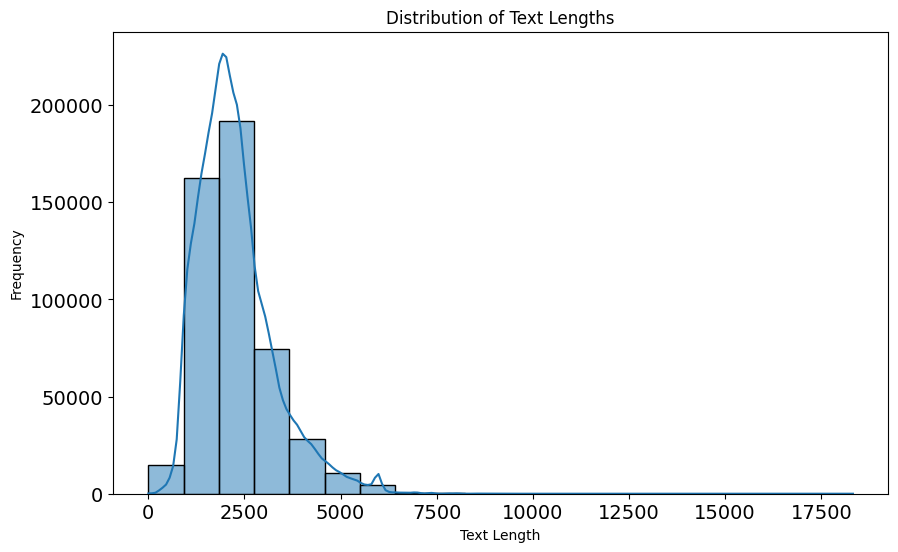

In [10]:
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=20, kde=True)
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [11]:
df['text_length'].describe()

count    487235.000000
mean       2269.586592
std         988.814028
min           1.000000
25%        1583.000000
50%        2102.000000
75%        2724.000000
max       18322.000000
Name: text_length, dtype: float64

In [12]:
df = df.drop(columns=['text_length'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487235 entries, 0 to 487234
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   text    487235 non-null  object 
 1   source  487235 non-null  float64
dtypes: float64(1), object(1)
memory usage: 7.4+ MB


In [14]:
df['text'][0]

'Cars. Cars have been around since they became famous in the 1900s, when Henry Ford created and built the first ModelT. Cars have played a major role in our every day lives since then. But now, people are starting to question if limiting car usage would be a good thing. To me, limiting the use of cars might be a good thing to do.\n\nIn like matter of this, article, "In German Suburb, Life Goes On Without Cars," by Elizabeth Rosenthal states, how automobiles are the linchpin of suburbs, where middle class families from either Shanghai or Chicago tend to make their homes. Experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe. Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europe...and up to 50 percent in some carintensive areas in the United States. Cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go. Article

In [15]:
def clean_text(text):
    cleaning_pattern = r'[^a-zA-Z\s]'

    clean_text = re.sub(cleaning_pattern, '', text)

    clean_text = clean_text.replace('\n', ' ')

    clean_text = re.sub(r'\s+', ' ', clean_text)

    return clean_text.strip()

In [16]:
df['text'] = df['text'].apply(clean_text)

In [17]:
df['text'] = df['text'].str.lower()

In [18]:
df['text'][0]

'cars cars have been around since they became famous in the s when henry ford created and built the first modelt cars have played a major role in our every day lives since then but now people are starting to question if limiting car usage would be a good thing to me limiting the use of cars might be a good thing to do in like matter of this article in german suburb life goes on without cars by elizabeth rosenthal states how automobiles are the linchpin of suburbs where middle class families from either shanghai or chicago tend to make their homes experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe passenger cars are responsible for percent of greenhouse gas emissions in europeand up to percent in some carintensive areas in the united states cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go article paris bans driving due to smog by r

In [19]:
df.head()

,text,source
0,cars cars have been around since they became f...,0.0
1,transportation is a large necessity in most co...,0.0
2,americas love affair with its vehicles seems t...,0.0
3,how often do you ride in a car do you drive a ...,0.0
4,cars are a wonderful thing they are perhaps on...,0.0


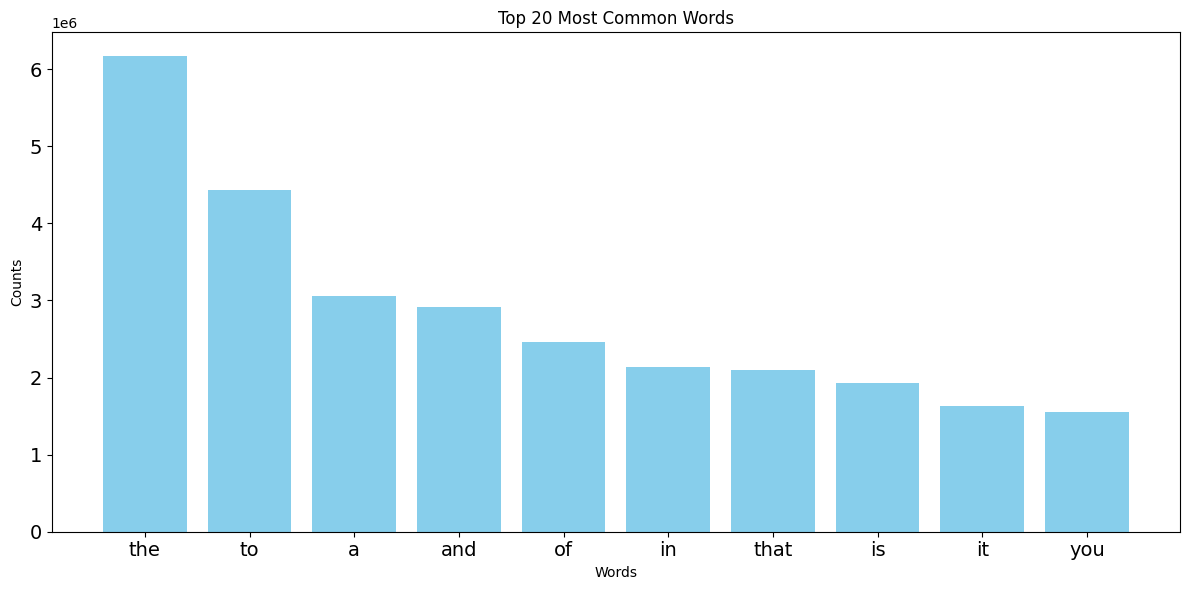

In [45]:
top_words = Counter(" ".join(df[df['source'] == 0]['text']).split()).most_common(10)

words, counts = zip(*top_words)

plt.figure(figsize=(12,6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

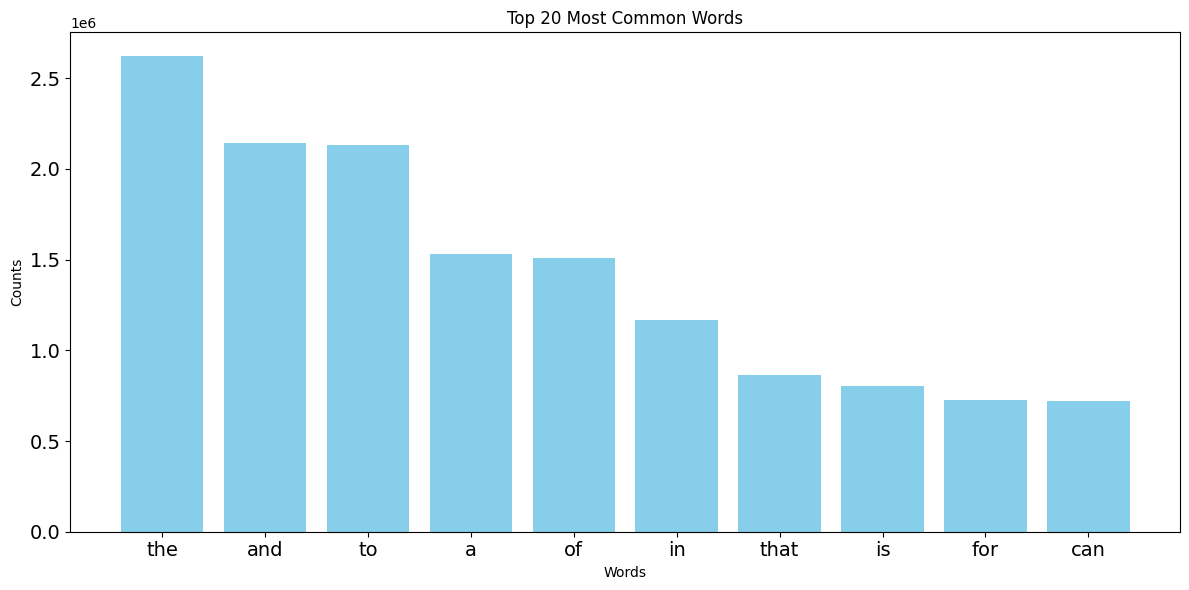

In [44]:
top_words = Counter(" ".join(df[df['source'] == 1]['text']).split()).most_common(10)

words, counts = zip(*top_words)

plt.figure(figsize=(12,6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()


In [22]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

df['tokenized_text'] = df['text'].apply(lambda x: word_tokenize(x))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [23]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return filtered_tokens

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
df['tokenized_text'] = df['tokenized_text'].apply(lambda x: remove_stopwords(x))

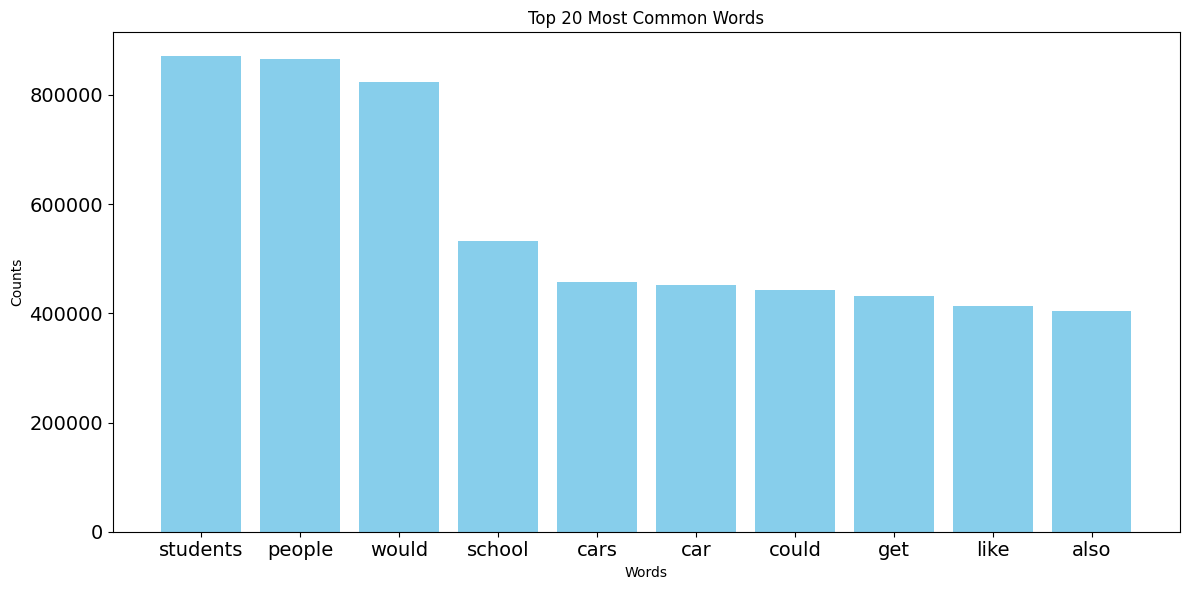

In [43]:
all_tokens = [token for tokens_list in df[df['source'] == 0]['tokenized_text'] for token in tokens_list]

top_words = Counter(all_tokens).most_common(10)

words, counts = zip(*top_words)

plt.figure(figsize=(12,6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

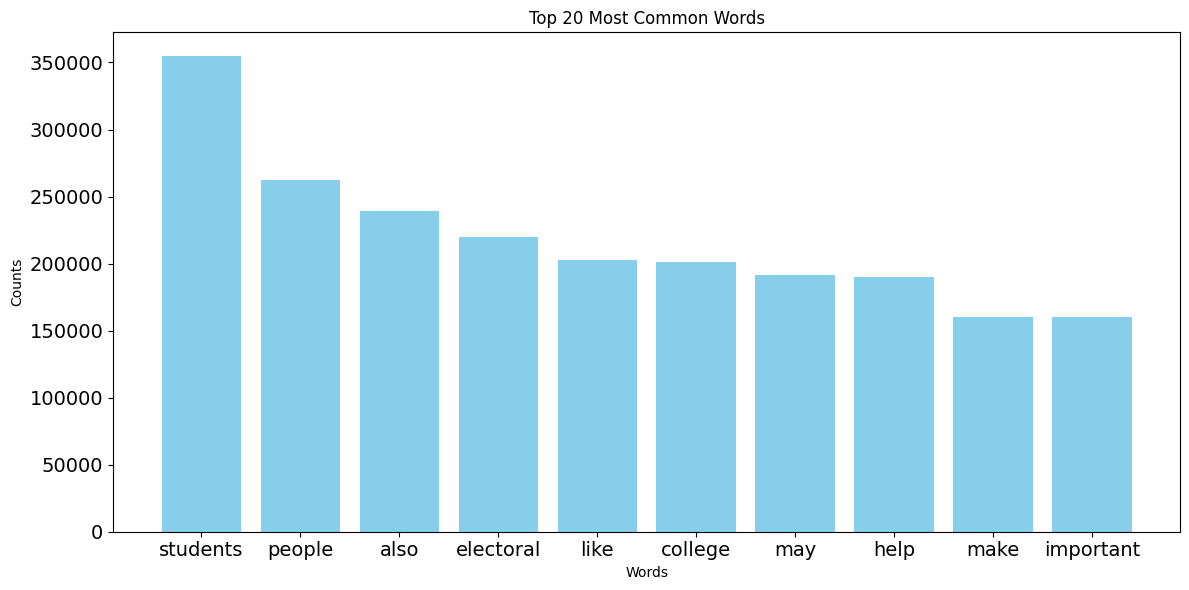

In [42]:
all_tokens = [token for tokens_list in df[df['source'] == 1]['tokenized_text'] for token in tokens_list]

top_words = Counter(all_tokens).most_common(10)

words, counts = zip(*top_words)

plt.figure(figsize=(12,6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

In [27]:
df['tokenized_text'][0]

['cars',
 'cars',
 'around',
 'since',
 'became',
 'famous',
 'henry',
 'ford',
 'created',
 'built',
 'first',
 'modelt',
 'cars',
 'played',
 'major',
 'role',
 'every',
 'day',
 'lives',
 'since',
 'people',
 'starting',
 'question',
 'limiting',
 'car',
 'usage',
 'would',
 'good',
 'thing',
 'limiting',
 'use',
 'cars',
 'might',
 'good',
 'thing',
 'like',
 'matter',
 'article',
 'german',
 'suburb',
 'life',
 'goes',
 'without',
 'cars',
 'elizabeth',
 'rosenthal',
 'states',
 'automobiles',
 'linchpin',
 'suburbs',
 'middle',
 'class',
 'families',
 'either',
 'shanghai',
 'chicago',
 'tend',
 'make',
 'homes',
 'experts',
 'say',
 'huge',
 'impediment',
 'current',
 'efforts',
 'reduce',
 'greenhouse',
 'gas',
 'emissions',
 'tailpipe',
 'passenger',
 'cars',
 'responsible',
 'percent',
 'greenhouse',
 'gas',
 'emissions',
 'europeand',
 'percent',
 'carintensive',
 'areas',
 'united',
 'states',
 'cars',
 'main',
 'reason',
 'greenhouse',
 'gas',
 'emissions',
 'lot',
 'peopl

In [28]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return lemmatized_tokens

df['lemmatized_text'] = df['tokenized_text'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\adham\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


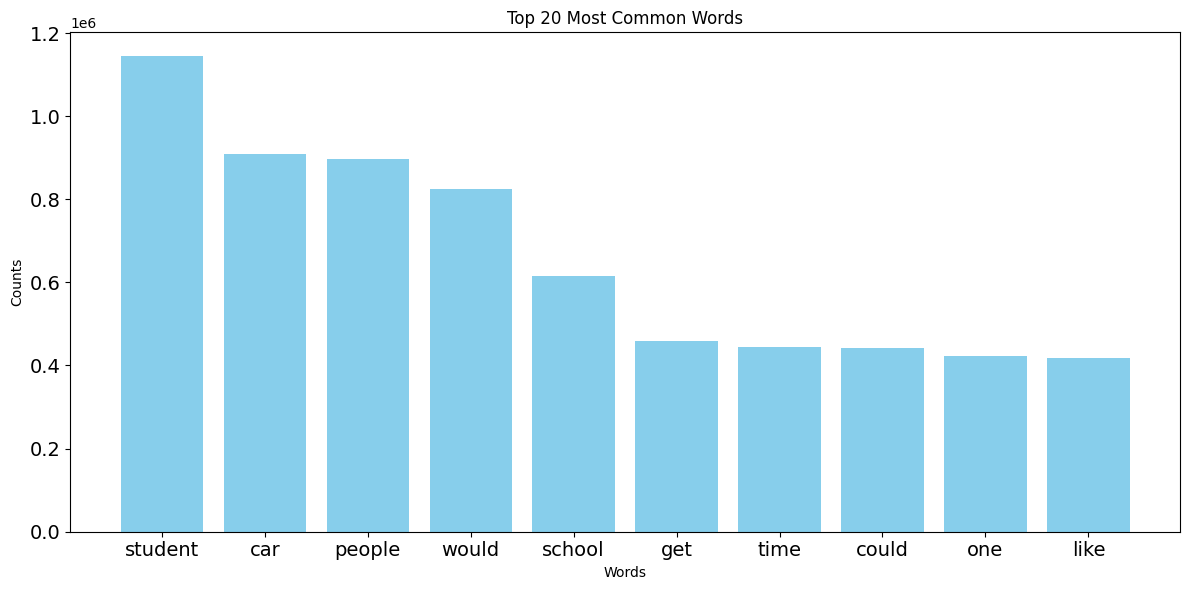

In [41]:
all_tokens = [token for tokens_list in df[df['source'] == 0]['lemmatized_text'] for token in tokens_list]

top_words = Counter(all_tokens).most_common(10)

words, counts = zip(*top_words)

plt.figure(figsize=(12,6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

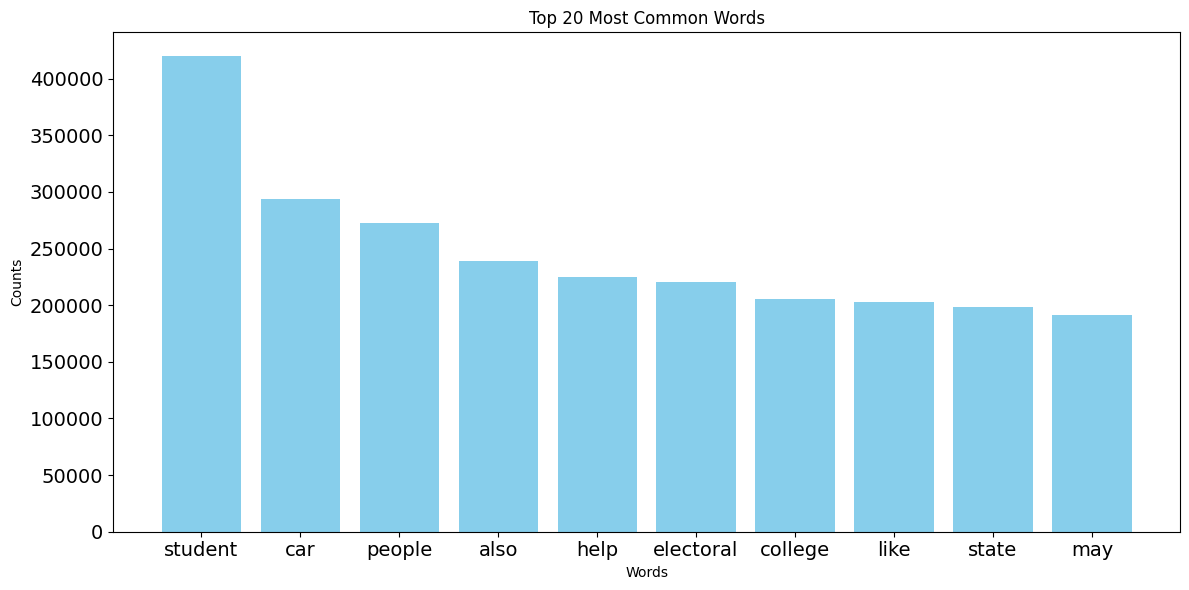

In [40]:
all_tokens = [token for tokens_list in df[df['source'] == 1]['lemmatized_text'] for token in tokens_list]

top_words = Counter(all_tokens).most_common(10)

words, counts = zip(*top_words)

plt.figure(figsize=(12,6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
df.to_pickle('essay.pkl')
#This was done once before. Do not run this cell just read the pkl file.

In [1]:
import pandas as pd
df = pd.read_pickle('pickles\essay.pkl')
# read the preprocessed data file.

In [2]:
X = df['lemmatized_text']
y = df['source']

In [3]:
X = [' '.join(doc) for doc in X]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
print(len(X_train))
print(len(y_train))

341064
341064


In [11]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
pipelines = {
    'Naive Bayes': Pipeline([
        ('count_vectorizer', CountVectorizer()),
        ('tfidf_transformer', TfidfTransformer()),
        ('classifier', MultinomialNB())
    ]),

    'Logistic Regression': Pipeline([
        ('count_vectorizer', CountVectorizer()),
        ('tfidf_transformer', TfidfTransformer()),
        ('classifier', LogisticRegression(max_iter=1000))
    ]),

    'Passive Aggressive': Pipeline([
        ('count_vectorizer', CountVectorizer()),
        ('tfidf_transformer', TfidfTransformer()),
        ('classifier', PassiveAggressiveClassifier(max_iter=1000))
    ]),
    
    'Random Forest': Pipeline([
        ('count_vectorizer', CountVectorizer()),
        ('tfidf_transformer', TfidfTransformer()),
        ('classifier', RandomForestClassifier(n_estimators=100))
    ]),

    'XGBoost': Pipeline([
        ('count_vectorizer', CountVectorizer()),
        ('tfidf_transformer', TfidfTransformer()),
        ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
    ]),
}

In [ ]:
nb_pipeline = pipelines['Naive Bayes']

nb_pipeline.fit(X_train, y_train)

nb_pred = nb_pipeline.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report 
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))

Naive Bayes Accuracy: 0.9492101716482749
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96     91597
         1.0       0.98      0.89      0.93     54574

    accuracy                           0.95    146171
   macro avg       0.96      0.94      0.94    146171
weighted avg       0.95      0.95      0.95    146171



In [ ]:
logreg_pipeline = pipelines['Logistic Regression']  
logreg_pipeline.fit(X_train, y_train)

logreg_pred = logreg_pipeline.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg_pred))
print(classification_report(y_test, logreg_pred))

Logistic Regression Accuracy: 0.9921119784362151
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     91597
         1.0       0.99      0.98      0.99     54574

    accuracy                           0.99    146171
   macro avg       0.99      0.99      0.99    146171
weighted avg       0.99      0.99      0.99    146171



In [ ]:
pa_pipeline = pipelines['Passive Aggressive']
pa_pipeline.fit(X_train, y_train)

pa_pred = pa_pipeline.predict(X_test)

print("Passive Aggressive Accuracy:", accuracy_score(y_test, pa_pred))
print(classification_report(y_test, pa_pred))

Passive Aggressive Accuracy: 0.9981733722831478
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     91597
         1.0       1.00      1.00      1.00     54574

    accuracy                           1.00    146171
   macro avg       1.00      1.00      1.00    146171
weighted avg       1.00      1.00      1.00    146171



In [ ]:
rf_pipeline = pipelines['Random Forest']
rf_pipeline.fit(X_train, y_train)

rf_pred = rf_pipeline.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.997844989772253
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     91597
         1.0       1.00      0.99      1.00     54574

    accuracy                           1.00    146171
   macro avg       1.00      1.00      1.00    146171
weighted avg       1.00      1.00      1.00    146171



In [14]:
xgb_pipeline = pipelines['XGBoost']
xgb_pipeline.fit(X_train, y_train)

XGBClassifier(tree_method='gpu_hist', use_label_encoder=False, eval_metric='logloss')

xgb_pred = xgb_pipeline.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

c:\Users\ammar\anaconda3\envs\tfenv\lib\site-packages\xgboost\core.py:158: UserWarning: [02:58:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9943901321055476
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     91597
         1.0       1.00      0.99      0.99     54574

    accuracy                           0.99    146171
   macro avg       0.99      0.99      0.99    146171
weighted avg       0.99      0.99      0.99    146171



The following section is designated for deep learning models.

In [2]:
print(type(df['lemmatized_text'][0]))
print(df['lemmatized_text'][0])

<class 'list'>
['car', 'car', 'around', 'since', 'became', 'famous', 'henry', 'ford', 'created', 'built', 'first', 'modelt', 'car', 'played', 'major', 'role', 'every', 'day', 'life', 'since', 'people', 'starting', 'question', 'limiting', 'car', 'usage', 'would', 'good', 'thing', 'limiting', 'use', 'car', 'might', 'good', 'thing', 'like', 'matter', 'article', 'german', 'suburb', 'life', 'go', 'without', 'car', 'elizabeth', 'rosenthal', 'state', 'automobile', 'linchpin', 'suburb', 'middle', 'class', 'family', 'either', 'shanghai', 'chicago', 'tend', 'make', 'home', 'expert', 'say', 'huge', 'impediment', 'current', 'effort', 'reduce', 'greenhouse', 'gas', 'emission', 'tailpipe', 'passenger', 'car', 'responsible', 'percent', 'greenhouse', 'gas', 'emission', 'europeand', 'percent', 'carintensive', 'area', 'united', 'state', 'car', 'main', 'reason', 'greenhouse', 'gas', 'emission', 'lot', 'people', 'driving', 'around', 'time', 'getting', 'need', 'go', 'article', 'paris', 'ban', 'driving', 'd

In [8]:
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Your tokenized texts are lists of words (strings)
texts = df['lemmatized_text'].tolist()  # List of lists of words

# Set the max vocabulary size (including OOV token)
max_vocab_size = 10000  # adjust as needed

# Create tokenizer and fit on your corpus with vocab limit
tokenizer = Tokenizer(num_words=max_vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)

# Convert texts to sequences of integer token IDs
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to the same length (max length or specify maxlen)
max_len = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# Now targets
y = df['source'].values

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)

# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.long)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

# Get vocab size for embedding layer (+1 because tokenizer num_words is exclusive)
vocab_size = max_vocab_size + 1
print(f"Vocabulary size for embedding: {vocab_size}")








Vocabulary size for embedding: 10001


In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from transformers import RobertaModel, ElectraModel

# Global hyperparameters (adjust as needed)
vocab_size = 29500  # if you're using a tokenizer like in Keras
embed_dim = 100    
hidden_dim=64                        

class DNNModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_classes):
        super(DNNModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.global_avg_pool = lambda x: torch.mean(x, dim=1)  # GlobalAveragePooling1D
        self.fc1 = nn.Linear(embed_dim, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 64)
        self.output = nn.Linear(64, num_classes)
        
    def forward(self, x):
        x = self.embedding(x)             # (batch, seq_len, embed_dim)
        x = self.global_avg_pool(x)       # (batch, embed_dim)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.output(x)
        return x




class BiLSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim):
        super(BiLSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True, bidirectional=True)

        self.output = nn.Linear(2 * hidden_dim, output_dim) 

    def forward(self, x):
        x = self.embedding(x)
        _, (h_n, _) = self.lstm(x)
        x = torch.cat((h_n[-2, :, :], h_n[-1, :, :]), dim=1)
        x = self.output(x) 
        return x


class CNNModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_classes):
        super(CNNModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.conv1d = nn.Conv1d(in_channels=embed_dim, out_channels=128, kernel_size=5)
        self.global_max_pool = nn.AdaptiveMaxPool1d(1)  # output size = 1
        self.fc1 = nn.Linear(128, 64)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.embedding(x)  # shape: (batch, seq_len, embed_dim)
        x = x.permute(0, 2, 1) # conv1d expects (batch, channels, seq_len)
        x = torch.relu(self.conv1d(x))
        x = self.global_max_pool(x).squeeze(-1)  # shape: (batch, 128)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


class GRUModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, gru_hidden_dim, num_classes):
        super(GRUModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.gru = nn.GRU(embed_dim, gru_hidden_dim, batch_first=True) 
        self.fc1 = nn.Linear(gru_hidden_dim, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 64)
        self.output = nn.Linear(64, num_classes)
        
    def forward(self, x):
        x = self.embedding(x)                 
        _, hn = self.gru(x)                   
        x = hn[-1]                            
        x = torch.relu(self.fc1(x))           
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))           
        x = self.output(x)                    
        return x
    
    




In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve, auc
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelBinarizer

def evaluate_model(model, data_loader, device):
    model.eval()
    all_labels_list, all_preds_list, all_probs_raw_list = [], [], []

    num_classes = 0
    if hasattr(model, 'output'):
        num_classes = model.output.out_features
    elif hasattr(model, 'fc2'):
        num_classes = model.fc2.out_features
    elif hasattr(model, 'fc') and isinstance(model.fc, nn.Linear):
        num_classes = model.fc.out_features
    else:
        raise AttributeError("Could not determine num_classes from model's output layer (expected 'output', 'fc2', or 'fc').")

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            if labels.dim() == 2 and labels.size(1) == 1:
                labels = labels.squeeze(1)

            outputs = model(inputs)

            if num_classes > 1:
                probs = F.softmax(outputs, dim=1)
                all_probs_raw_list.extend(probs.cpu().numpy())
                
                _, preds = torch.max(outputs, 1)
                all_preds_list.extend(preds.cpu().numpy())
                all_labels_list.extend(labels.cpu().numpy())
            else: # Binary classification with a single output unit (if ever used)
                outputs_sigmoid = torch.sigmoid(outputs)
                probs = outputs_sigmoid.cpu().numpy()
                all_probs_raw_list.extend(probs.flatten()) # Ensure 1D for 1-output binary
                
                preds = (outputs_sigmoid >= 0.5).float().cpu().numpy()
                all_preds_list.extend(preds.flatten())
                all_labels_list.extend(labels.cpu().numpy().flatten())

    # Ensure all_labels is a 1D array of integer type
    all_labels = np.array(all_labels_list).flatten().astype(int) 
    all_preds = np.array(all_preds_list).flatten().astype(int)

    # Process all_probs_raw_list based on num_classes for metrics
    if num_classes == 2:
        all_probs_for_auc = np.array(all_probs_raw_list) # Will be (N, 2)
        if all_probs_for_auc.ndim == 2: # Take probabilities of the positive class
            all_probs_for_auc = all_probs_for_auc[:, 1]
        elif all_probs_for_auc.ndim == 1 and np.unique(all_labels).size == 2: # Already 1D sigmoid output
            pass # Keep as is
        else:
            print("Warning: Unexpected shape for all_probs_raw_list in binary evaluation. Reshaping to 1D.")
            all_probs_for_auc = all_probs_for_auc.flatten()
            
    elif num_classes > 2:
        all_probs_for_auc = np.array(all_probs_raw_list) # Will be (N, num_classes)
        # Ensure it's 2D if it's supposed to be multi-class probabilities
        if all_probs_for_auc.ndim == 1 and num_classes > 1: # if somehow flattened for multiclass
            print(f"Warning: all_probs_raw_list is 1D for multi-class {num_classes}. This is likely incorrect for AUC.")
            # This should ideally not happen if softmax output is extended directly.
            # If it does, there's a deeper issue in how all_probs_raw_list is collected.
            
    else: # num_classes is 1 or unexpected
        all_probs_for_auc = np.array(all_probs_raw_list).flatten() # Default to 1D if single class


    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
    recall = recall_score(all_labels, all_preds, average='weighted', zero_division=0)
    f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=0)
    
    roc_auc = float('nan')
    if num_classes == 2:
        try:
            roc_auc = roc_auc_score(all_labels, all_probs_for_auc)
        except ValueError:
            roc_auc = 0.0
    elif num_classes > 2:
        # Check that all_probs_for_auc has the correct 2D shape for multi_class='ovr'
        if all_probs_for_auc.shape == (len(all_labels), num_classes):
            try:
                roc_auc = roc_auc_score(all_labels, all_probs_for_auc, multi_class='ovr', average='weighted')
            except ValueError:
                roc_auc = 0.0
        else:
            print(f"Warning: all_probs_for_auc shape {all_probs_for_auc.shape} mismatch with expected ({len(all_labels)}, {num_classes}) for multi-class AUC.")

    cm = confusion_matrix(all_labels, all_preds)

    print(f"Evaluation - Accuracy:  {accuracy:.4f}")
    print(f"Evaluation - Precision: {precision:.4f}")
    print(f"Evaluation - Recall:    {recall:.4f}")
    print(f"Evaluation - F1 Score:  {f1:.4f}")
    if not np.isnan(roc_auc):
        print(f"Evaluation - AUC-ROC:   {roc_auc:.4f}")
    else:
        print("Evaluation - AUC-ROC:   Not applicable or calculation failed for AUC-ROC.")

    # Return all_labels as int type, and all_probs_for_auc for plotting
    return all_labels, all_probs_for_auc, cm


def plot_confusion_matrix(cm, labels=None):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()


def plot_roc_curve(y_true, y_probs, num_classes, class_labels=None):
    # Ensure y_true is 1D and integer for roc_curve regardless of multi-class or binary
    y_true = np.array(y_true).flatten().astype(int)

    if num_classes == 2:
        # y_probs should be 1D for binary
        if y_probs.ndim > 1 and y_probs.shape[1] == 2:
            # If it's (N, 2), take the positive class probability
            y_probs = y_probs[:, 1]
        elif y_probs.ndim > 1 and y_probs.shape[1] == 1:
            y_probs = y_probs.flatten() # if it's (N, 1)

        fpr, tpr, _ = roc_curve(y_true, y_probs)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(6, 5))
        plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve")
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.show()
    elif num_classes > 2:
        print("\nPlotting One-vs-Rest ROC Curves for multi-class.")
        plt.figure(figsize=(8, 7))
        
        lb = LabelBinarizer()
        y_true_bin = lb.fit_transform(y_true) # y_true is already 1D int
        
        # y_probs must be 2D (n_samples, n_classes) for multi-class OVR plotting
        if y_probs.ndim != 2 or y_probs.shape[1] != num_classes:
             print(f"Warning: y_probs shape {y_probs.shape} is not (n_samples, {num_classes}) for multi-class One-vs-Rest ROC plotting. Skipping.")
             return

        for i in range(num_classes):
            # Check if the class exists in y_true_bin (i.e., if there are samples for this class)
            if y_true_bin[:, i].sum() == 0 and y_probs[:, i].sum() == 0:
                continue

            try:
                fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_probs[:, i])
                class_roc_auc = auc(fpr, tpr)
            except ValueError as e:
                print(f"Could not plot ROC for class {i} ({class_labels[i] if class_labels else ''}): {e}")
                continue

            label_name = class_labels[i] if class_labels and i < len(class_labels) else f"Class {i}"
            plt.plot(fpr, tpr, label=f'{label_name} (AUC = {class_roc_auc:.2f})')

        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('One-vs-Rest ROC Curve')
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.show()
    else:
        print(f"ROC Curve plotting is typically for binary or multi-class (One-vs-Rest). Your model has {num_classes} class(es).")


def train_model(model, train_loader, test_loader, device, model_name="Model", epochs=5):
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    train_losses, test_accuracies = [], []

    for epoch in range(epochs):
        model.train()
        epoch_loss = 0.0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)

            if labels.dim() == 2 and labels.size(1) == 1:
                labels = labels.squeeze(1)

            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        train_losses.append(epoch_loss / len(train_loader))

        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                if labels.dim() == 2 and labels.size(1) == 1:
                    labels = labels.squeeze(1)

                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)

                correct += (predicted == labels).sum().item()
                total += labels.size(0)
        
        accuracy = correct / total
        test_accuracies.append(accuracy)
        print(f"{model_name} - Epoch {epoch+1}/{epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.4f}")

    print("\n--- Model Evaluation ---")
    
    num_classes = 0
    if hasattr(model, 'output'):
        num_classes = model.output.out_features
    elif hasattr(model, 'fc2'):
        num_classes = model.fc2.out_features
    elif hasattr(model, 'fc') and isinstance(model.fc, nn.Linear):
        num_classes = model.fc.out_features
    else:
        print("Warning: Could not determine num_classes from known output layer names. Defaulting to 2.")
        num_classes = 2

    class_labels = None
    if 'y_test' in globals() and y_test is not None:
        unique_labels = sorted(np.unique(y_test))
        class_labels = [str(int(label)) for label in unique_labels]
        if num_classes != len(unique_labels):
            print(f"Warning: Model's output_dim ({num_classes}) does not match number of unique labels in y_test ({len(unique_labels)}). Adjusting for plotting consistency.")
            # It's better to use model's actual num_classes for probability handling,
            # but for labels, use the actual number from data. Let's make sure `num_classes` used
            # for `plot_roc_curve` refers to the model's output features.
            # No, keep num_classes derived from model, and `class_labels` from `y_test`.
            pass # No change to num_classes derived from model here
    else:
        print("Warning: y_test not found or is None. Cannot determine class labels for plotting.")
        class_labels = [str(i) for i in range(num_classes)]

    try:
        actual_labels, predicted_probs, confusion_matrix_result = evaluate_model(model, test_loader, device)
        
        plot_confusion_matrix(confusion_matrix_result, labels=class_labels)

        plot_roc_curve(actual_labels, predicted_probs, num_classes=num_classes, class_labels=class_labels)

    except Exception as e:
        print(f"An error occurred during evaluation or plotting: {e}")

    return model, train_losses, test_accuracies

In [ ]:
print(f"Max token in input: {X_train_tensor.max().item()}")
print(f"Vocab size: {vocab_size}")

In [ ]:
print(torch.unique(y_train_tensor))
print(torch.unique(y_test_tensor))

In [16]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

TextCNN - Epoch 1/5, Loss: 0.0376, Accuracy: 0.9974
TextCNN - Epoch 2/5, Loss: 0.0094, Accuracy: 0.9987
TextCNN - Epoch 3/5, Loss: 0.0058, Accuracy: 0.9989
TextCNN - Epoch 4/5, Loss: 0.0043, Accuracy: 0.9986
TextCNN - Epoch 5/5, Loss: 0.0035, Accuracy: 0.9991

--- Model Evaluation ---
Evaluation - Accuracy:  0.9991
Evaluation - Precision: 0.9991
Evaluation - Recall:    0.9991
Evaluation - F1 Score:  0.9991
Evaluation - AUC-ROC:   1.0000


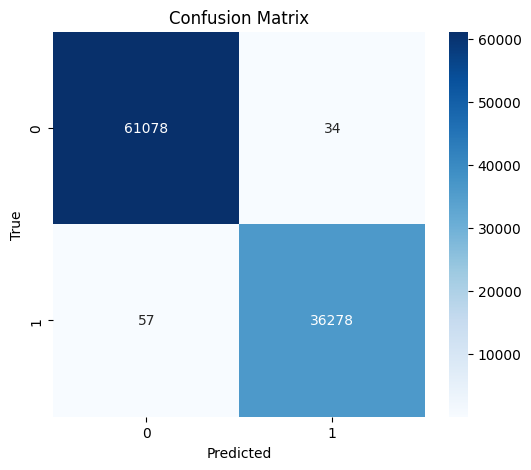

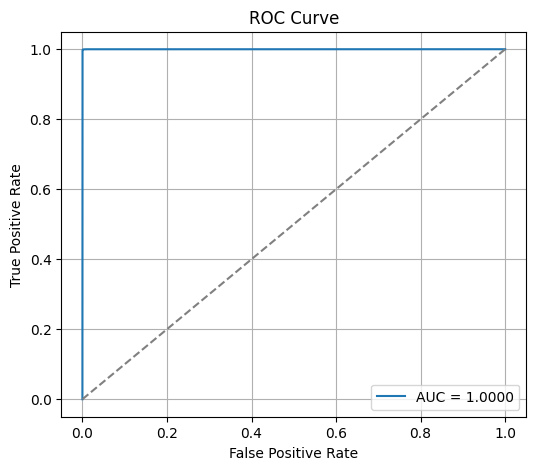

In [17]:
num_classes_CNN = len(np.unique(y))
# CNN
cnn_model = CNNModel(
    vocab_size=10000, 
    embed_dim=128,    
    num_classes=num_classes_CNN
).to(device)
trained_cnn, cnn_losses, cnn_accs = train_model(
    cnn_model,
    train_loader,
    test_loader,
    device,
    model_name="TextCNN", 
    epochs=5 
)

In [ ]:
torch.save(trained_cnn, "cnn_modelESSAY.pkl")

BI-LSTM - Epoch 1/5, Loss: 0.0817, Accuracy: 0.9940
BI-LSTM - Epoch 2/5, Loss: 0.0161, Accuracy: 0.9969
BI-LSTM - Epoch 3/5, Loss: 0.0074, Accuracy: 0.9978
BI-LSTM - Epoch 4/5, Loss: 0.0045, Accuracy: 0.9983
BI-LSTM - Epoch 5/5, Loss: 0.0036, Accuracy: 0.9984

--- Model Evaluation ---
Evaluation - Accuracy:  0.9984
Evaluation - Precision: 0.9984
Evaluation - Recall:    0.9984
Evaluation - F1 Score:  0.9984
Evaluation - AUC-ROC:   0.9999


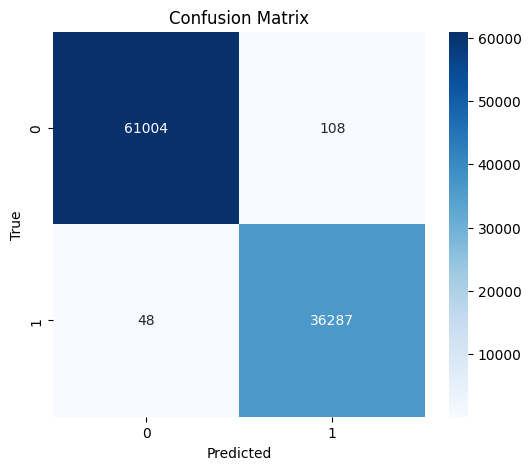

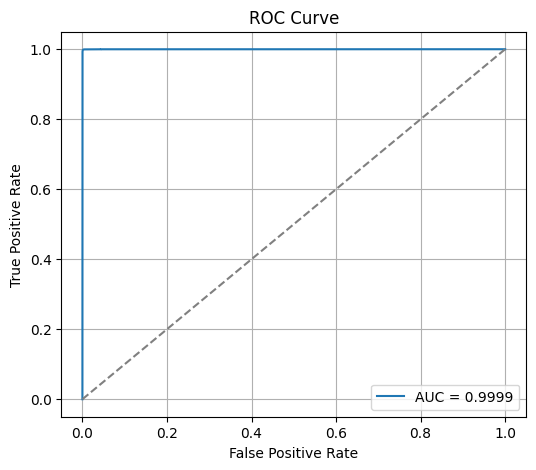

In [ ]:
# Bi-LSTM
num_classes_BiLSTM = len(np.unique(y))
Bilstm_model = BiLSTMModel(
    vocab_size=10000,
    embed_dim=128,
    hidden_dim=64, 
    output_dim=num_classes_BiLSTM
).to(device)
trained_bilstm, losses, accs = train_model(Bilstm_model, train_loader, test_loader, device, model_name="BI-LSTM", epochs=5)


In [ ]:
torch.save(trained_bilstm, "bilstm_modelESSAY.pkl")

GRU - Epoch 1/5, Loss: 0.4232, Accuracy: 0.9923
GRU - Epoch 2/5, Loss: 0.0128, Accuracy: 0.9976
GRU - Epoch 3/5, Loss: 0.0060, Accuracy: 0.9974
GRU - Epoch 4/5, Loss: 0.0044, Accuracy: 0.9983
GRU - Epoch 5/5, Loss: 0.0033, Accuracy: 0.9979

--- Model Evaluation ---
Evaluation - Accuracy:  0.9979
Evaluation - Precision: 0.9979
Evaluation - Recall:    0.9979
Evaluation - F1 Score:  0.9979
Evaluation - AUC-ROC:   0.9999


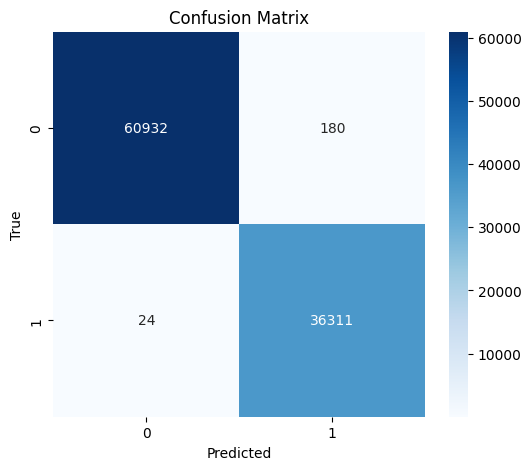

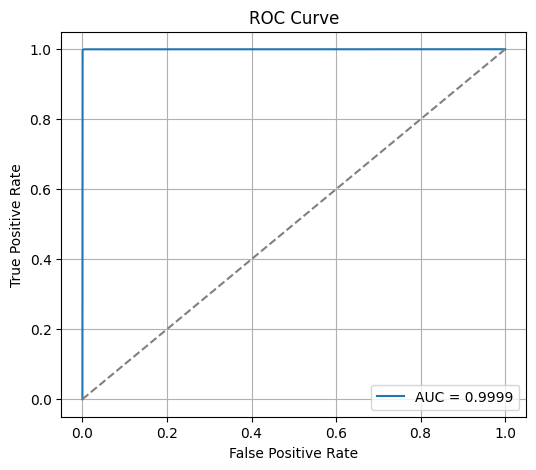

In [ ]:
# GRU
num_classes_GRU = len(np.unique(y))
gru_model = GRUModel(
    vocab_size=10000, 
    embed_dim=128, 
    gru_hidden_dim=128, 
    num_classes=num_classes_GRU
).to(device)
trained_gru, losses, accs = train_model(gru_model, train_loader, test_loader, device, model_name="GRU", epochs=5)

In [ ]:
torch.save(trained_gru, "gru_modelESSAY.pkl")

DNN - Epoch 1/5, Loss: 0.0787, Accuracy: 0.9925
DNN - Epoch 2/5, Loss: 0.0242, Accuracy: 0.9962
DNN - Epoch 3/5, Loss: 0.0157, Accuracy: 0.9970
DNN - Epoch 4/5, Loss: 0.0115, Accuracy: 0.9973
DNN - Epoch 5/5, Loss: 0.0083, Accuracy: 0.9976

--- Model Evaluation ---
Evaluation - Accuracy:  0.9976
Evaluation - Precision: 0.9976
Evaluation - Recall:    0.9976
Evaluation - F1 Score:  0.9976
Evaluation - AUC-ROC:   0.9999


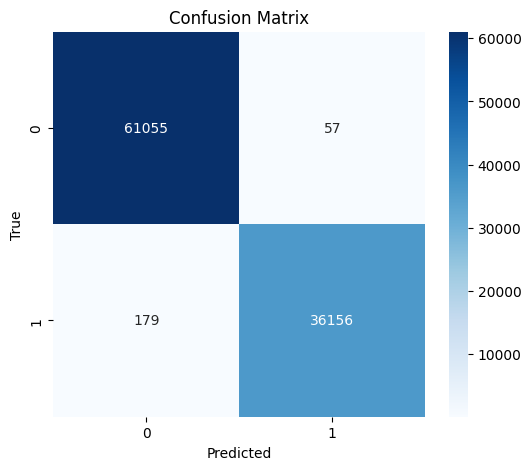

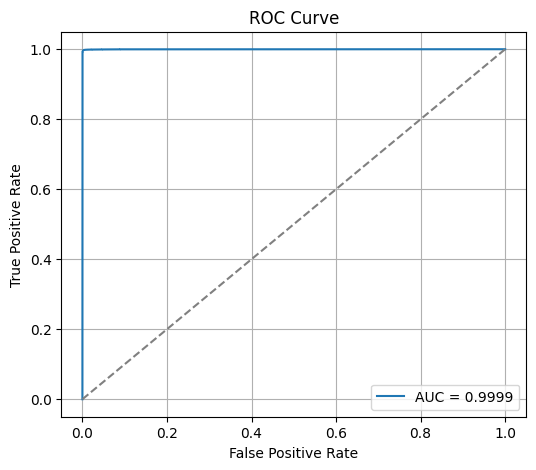

In [20]:
# DNN
num_classes_DNN = len(np.unique(y))
dnn_model = DNNModel(vocab_size=10000, 
    embed_dim=128,   
    num_classes=num_classes_DNN)
trained_dnn, losses, accs = train_model(dnn_model, train_loader, test_loader, device, model_name="DNN", epochs=5)

In [ ]:
torch.save(trained_dnn, "dnn_modelESSAY.pkl")

In [1]:
import pandas as pd
df = pd.read_pickle('pickles\essay.pkl')
# read the preprocessed data file.

In [3]:
df.head()

,text,source,tokenized_text,lemmatized_text
0,cars cars have been around since they became f...,0.0,"[cars, cars, around, since, became, famous, he...","[car, car, around, since, became, famous, henr..."
1,transportation is a large necessity in most co...,0.0,"[transportation, large, necessity, countries, ...","[transportation, large, necessity, country, wo..."
2,americas love affair with its vehicles seems t...,0.0,"[americas, love, affair, vehicles, seems, cool...","[america, love, affair, vehicle, seems, coolin..."
3,how often do you ride in a car do you drive a ...,0.0,"[often, ride, car, drive, one, motor, vehicle,...","[often, ride, car, drive, one, motor, vehicle,..."
4,cars are a wonderful thing they are perhaps on...,0.0,"[cars, wonderful, thing, perhaps, one, worlds,...","[car, wonderful, thing, perhaps, one, world, g..."


In [2]:
from transformers import (
    RobertaTokenizer,
    ElectraTokenizer
)

from TransformersTraining import build_roberta, build_electra, split_dataframe, train_Transformers
train_df, val_df, test_df = split_dataframe(df)

c:\Users\ammar\anaconda3\envs\tfenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


c:\Users\ammar\anaconda3\envs\tfenv\lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\ammar\anaconda3\envs\tfenv\lib\site-packages\transformers\optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Epoch 1:   5%|▍         | 999/21317 [06:02<2:01:33,  2.79it/s, loss=0.139]  


Saved checkpoint at iter 1000: checkpoints_roberta\ckpt_iter1000.pt


Epoch 1:   5%|▍         | 1000/21317 [06:45<75:07:02, 13.31s/it, loss=0.139, avg_train_loss=0.37, val_loss=0.0573]


Saved improved checkpoint: checkpoints_roberta\best_iter1000_val_0.0573.pt


Epoch 1:   9%|▉         | 1999/21317 [12:45<1:56:14,  2.77it/s, loss=0.0299]                                      


Saved checkpoint at iter 2000: checkpoints_roberta\ckpt_iter2000.pt


Epoch 1:   9%|▉         | 2000/21317 [13:35<81:00:05, 15.10s/it, loss=0.0299, avg_train_loss=0.0789, val_loss=0.0185]


Saved improved checkpoint: checkpoints_roberta\best_iter2000_val_0.0185.pt


Epoch 1:  14%|█▍        | 2999/21317 [19:42<1:50:39,  2.76it/s, loss=0.00866]                                        


Saved checkpoint at iter 3000: checkpoints_roberta\ckpt_iter3000.pt


Epoch 1:  19%|█▉        | 3999/21317 [26:23<1:43:57,  2.78it/s, loss=0.32]                                           


Saved checkpoint at iter 4000: checkpoints_roberta\ckpt_iter4000.pt


Epoch 1:  23%|██▎       | 4999/21317 [33:08<1:40:05,  2.72it/s, loss=0.00135]                                     


Saved checkpoint at iter 5000: checkpoints_roberta\ckpt_iter5000.pt


Epoch 1:  23%|██▎       | 5000/21317 [33:53<62:07:14, 13.71s/it, loss=0.00135, avg_train_loss=0.0454, val_loss=0.00836]


Saved improved checkpoint: checkpoints_roberta\best_iter5000_val_0.0084.pt


Epoch 1:  28%|██▊       | 5999/21317 [39:57<1:32:48,  2.75it/s, loss=0.0165]                                           


Saved checkpoint at iter 6000: checkpoints_roberta\ckpt_iter6000.pt


Epoch 1:  33%|███▎      | 6999/21317 [46:51<1:26:12,  2.77it/s, loss=0.104]                                         


Saved checkpoint at iter 7000: checkpoints_roberta\ckpt_iter7000.pt


Epoch 1:  38%|███▊      | 7999/21317 [53:33<1:19:45,  2.78it/s, loss=0.00373]                                       


Saved checkpoint at iter 8000: checkpoints_roberta\ckpt_iter8000.pt


Epoch 1:  42%|████▏     | 8999/21317 [1:00:14<1:12:54,  2.82it/s, loss=0.0386]                                        


Saved checkpoint at iter 9000: checkpoints_roberta\ckpt_iter9000.pt


Epoch 1:  47%|████▋     | 9999/21317 [1:06:57<1:08:45,  2.74it/s, loss=0.0825]                                         


Saved checkpoint at iter 10000: checkpoints_roberta\ckpt_iter10000.pt


Epoch 1:  52%|█████▏    | 10999/21317 [1:13:42<1:02:14,  2.76it/s, loss=0.00183]                                        


Saved checkpoint at iter 11000: checkpoints_roberta\ckpt_iter11000.pt


Epoch 1:  56%|█████▋    | 11999/21317 [1:20:22<57:00,  2.72it/s, loss=0.0179]                                            


Saved checkpoint at iter 12000: checkpoints_roberta\ckpt_iter12000.pt


Epoch 1:  61%|██████    | 12999/21317 [1:27:09<51:13,  2.71it/s, loss=0.00638]                                           


Saved checkpoint at iter 13000: checkpoints_roberta\ckpt_iter13000.pt


Epoch 1:  66%|██████▌   | 13999/21317 [1:33:56<45:26,  2.68it/s, loss=0.00384]                                           


Saved checkpoint at iter 14000: checkpoints_roberta\ckpt_iter14000.pt


Epoch 1:  70%|███████   | 14999/21317 [1:40:41<38:25,  2.74it/s, loss=0.00518]                                            


Saved checkpoint at iter 15000: checkpoints_roberta\ckpt_iter15000.pt


Epoch 1:  75%|███████▌  | 15999/21317 [1:47:27<32:16,  2.75it/s, loss=0.251]                                             


Saved checkpoint at iter 16000: checkpoints_roberta\ckpt_iter16000.pt


Epoch 1:  80%|███████▉  | 16999/21317 [1:54:07<25:39,  2.80it/s, loss=0.00523]                                         


Saved checkpoint at iter 17000: checkpoints_roberta\ckpt_iter17000.pt


Epoch 1:  84%|████████▍ | 17999/21317 [2:00:45<19:43,  2.80it/s, loss=0.0175]                                            


Saved checkpoint at iter 18000: checkpoints_roberta\ckpt_iter18000.pt


Epoch 1:  89%|████████▉ | 18999/21317 [2:07:24<14:01,  2.75it/s, loss=0.00453]                                          


Saved checkpoint at iter 19000: checkpoints_roberta\ckpt_iter19000.pt


Epoch 1:  94%|█████████▍| 19999/21317 [2:14:04<07:55,  2.77it/s, loss=0.274]                                            


Saved checkpoint at iter 20000: checkpoints_roberta\ckpt_iter20000.pt


Epoch 1:  99%|█████████▊| 20999/21317 [2:20:44<01:53,  2.79it/s, loss=0.0149]                                       


Saved checkpoint at iter 21000: checkpoints_roberta\ckpt_iter21000.pt


Epoch 1: 100%|██████████| 21317/21317 [2:23:17<00:00,  2.48it/s, loss=0.00786]                                         


Epoch 1 validation loss: 0.0550


Epoch 2:   1%|          | 257/21317 [01:32<2:06:41,  2.77it/s, loss=0.00787]



Stopping training by user request...
Saved loss curve at stop: checkpoints_roberta\loss_curve_stopped_iter21575.png
Stopped by user. Saved last checkpoint: checkpoints_roberta\last_iter21575.pt


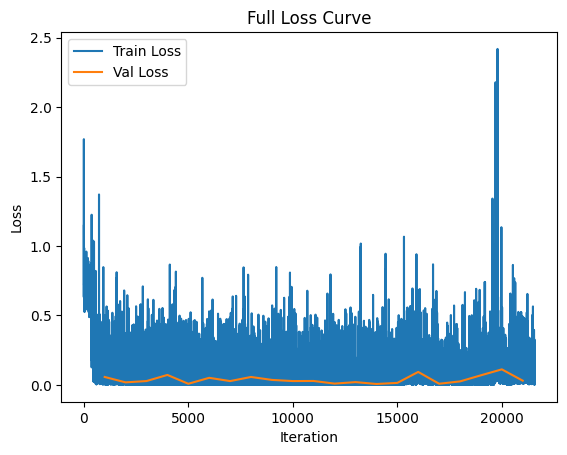

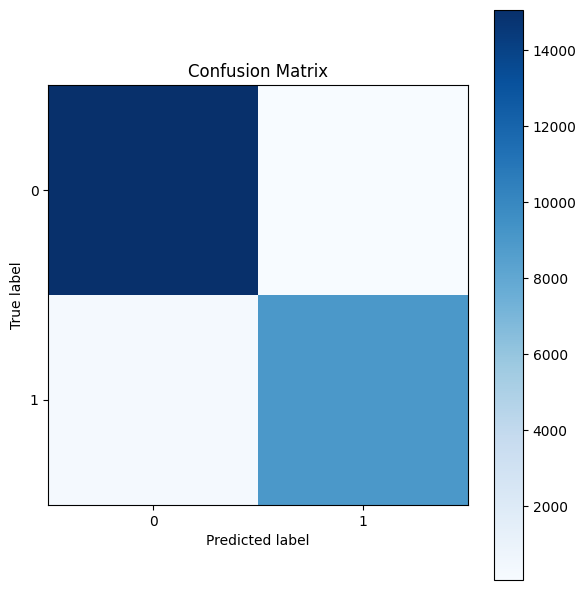

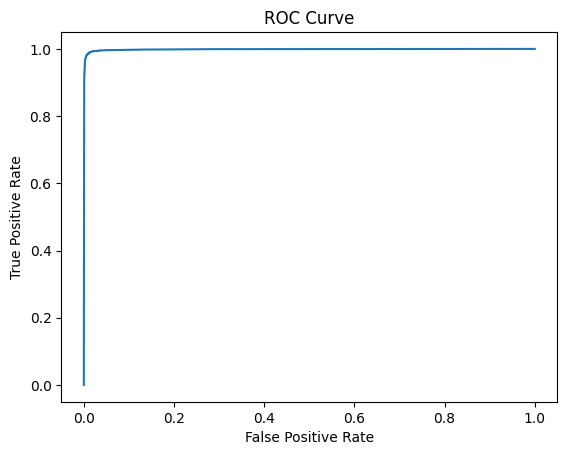

In [3]:
roberta = build_roberta()
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
train_Transformers(roberta, tokenizer, train_df, val_df,
      lr=2e-5, weight_decay=0.01, epochs=3, loss_check=1000)

c:\Users\ammar\anaconda3\envs\tfenv\lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\ammar\anaconda3\envs\tfenv\lib\site-packages\transformers\optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Epoch 1:   5%|▍         | 999/21317 [06:54<2:20:11,  2.42it/s, loss=0.625]  


Saved checkpoint at iter 1000: checkpoints_electra\ckpt_iter1000.pt


Epoch 1:   5%|▍         | 1000/21317 [09:06<227:15:15, 40.27s/it, loss=0.625, avg_train_loss=0.365, val_loss=0.123]


Saved improved checkpoint: checkpoints_electra\best_iter1000_val_0.1227.pt


Epoch 1:   9%|▉         | 1999/21317 [16:07<2:17:26,  2.34it/s, loss=0.399]                                        


Saved checkpoint at iter 2000: checkpoints_electra\ckpt_iter2000.pt


Epoch 1:  14%|█▍        | 2999/21317 [25:12<2:09:01,  2.37it/s, loss=0.0912]                                       


Saved checkpoint at iter 3000: checkpoints_electra\ckpt_iter3000.pt


Epoch 1:  19%|█▉        | 3999/21317 [34:21<2:01:52,  2.37it/s, loss=0.0203]                                          


Saved checkpoint at iter 4000: checkpoints_electra\ckpt_iter4000.pt


Epoch 1:  23%|██▎       | 4999/21317 [43:33<1:54:33,  2.37it/s, loss=0.00143]                                         


Saved checkpoint at iter 5000: checkpoints_electra\ckpt_iter5000.pt


Epoch 1:  28%|██▊       | 5999/21317 [52:39<1:46:03,  2.41it/s, loss=0.00467]                                         


Saved checkpoint at iter 6000: checkpoints_electra\ckpt_iter6000.pt


Epoch 1:  33%|███▎      | 6999/21317 [1:01:40<1:37:39,  2.44it/s, loss=0.00608]                                        


Saved checkpoint at iter 7000: checkpoints_electra\ckpt_iter7000.pt


Epoch 1:  33%|███▎      | 7000/21317 [1:04:02<171:04:20, 43.02s/it, loss=0.00608, avg_train_loss=0.0382, val_loss=0.0124]


Saved improved checkpoint: checkpoints_electra\best_iter7000_val_0.0124.pt


Epoch 1:  38%|███▊      | 7999/21317 [1:10:54<1:36:29,  2.30it/s, loss=0.0092]                                           


Saved checkpoint at iter 8000: checkpoints_electra\ckpt_iter8000.pt


Epoch 1:  38%|███▊      | 8018/21317 [1:13:15<2:01:31,  1.82it/s, loss=0.0759]                                          



Stopping training by user request...
Saved loss curve at stop: checkpoints_electra\loss_curve_stopped_iter8019.png
Stopped by user. Saved last checkpoint: checkpoints_electra\last_iter8019.pt


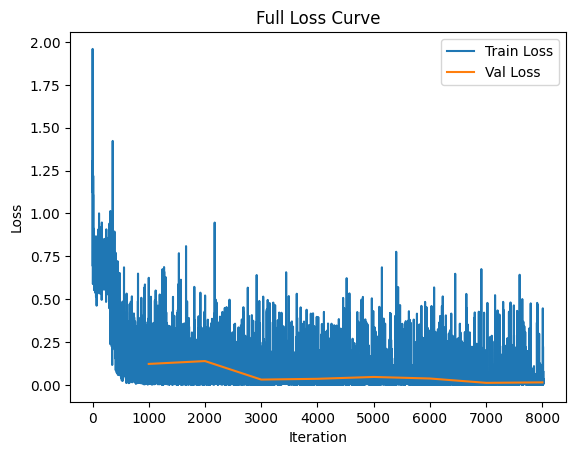

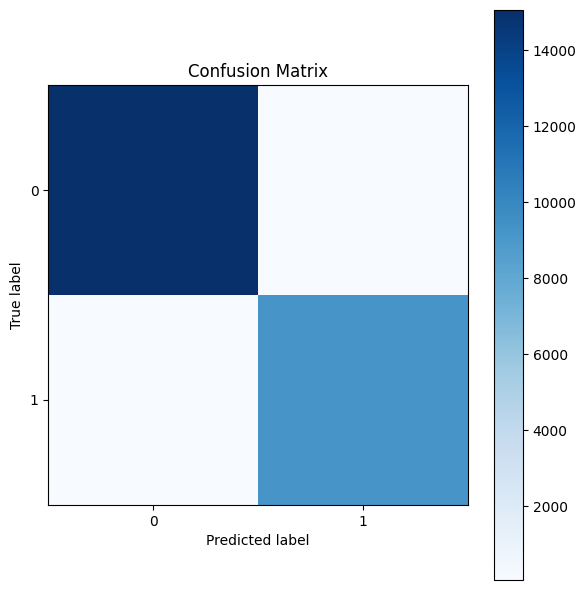

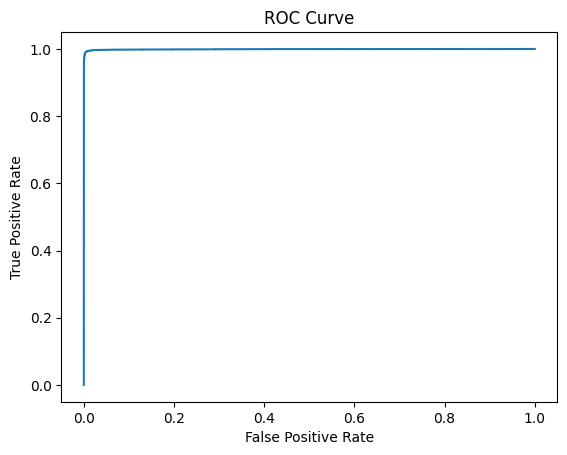

In [4]:
electra = build_electra()
tokenizer = ElectraTokenizer.from_pretrained('google/electra-base-discriminator')
train_Transformers(electra, tokenizer, train_df, val_df,
      lr=2e-5, weight_decay=0.01, epochs=3, loss_check=1000)

In [ ]:
file_path = r"G:\College\semester 6\Foundation of Data Science\Project" 

pipeline_filename = 'essay_passive_aggressive_pipeline.pkl'

full_output_path = os.path.join(file_path, pipeline_filename)
 
joblib.dump(pa_pipeline, full_output_path)

print(f"Pipeline saved to: {full_output_path}")

Pipeline saved to: G:\College\semester 6\Foundation of Data Science\Project\essay_passive_aggressive_pipeline.pkl
